In [218]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [219]:
wine = datasets.load_wine()

In [220]:
X = wine.data

In [221]:
data_wine = pd.DataFrame(X,columns=wine.feature_names)

In [222]:
data_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# PCA (Principal component analysis)

In [223]:
def PCA(X,component_k):
    N, M = X.shape
    cov = np.zeros((M, M))

    for i in range(M):
        mean_i = np.sum(X[:, i]) / N
        for j in range(M):
            mean_j = np.sum(X[:, j]) / N
            cov[i, j] = np.sum((X[:, i] - mean_i) * (X[:, j] - mean_j)) / (N - 1)
     
    eigen_values , eigen_vectors = np.linalg.eigh(cov)
     
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:component_k]
     
    X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()
     
    return X_reduced,sorted_eigenvalue,sorted_eigenvectors

In [224]:
X_reduce,eig_val,eig_vector = PCA(X,2)
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_reduce , columns = ['PC1','PC2'])

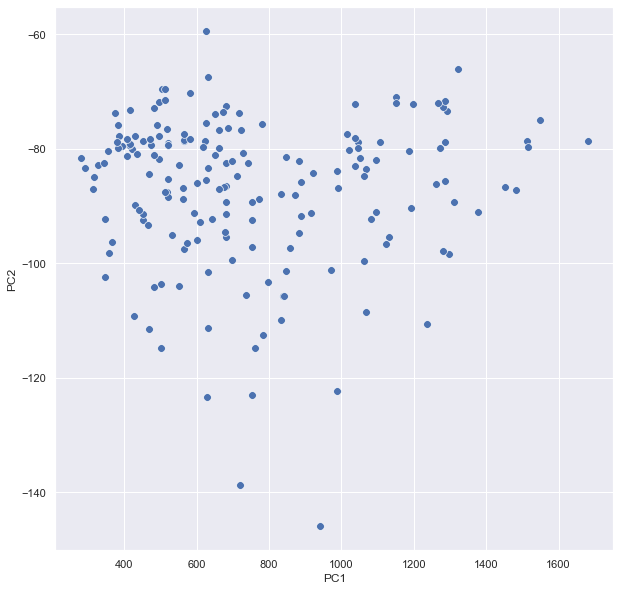

In [225]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , s = 60 , palette= 'icefire')
plt.show()

In [226]:
principal_df_true = principal_df.copy()
principal_df_true['Label'] = wine.target


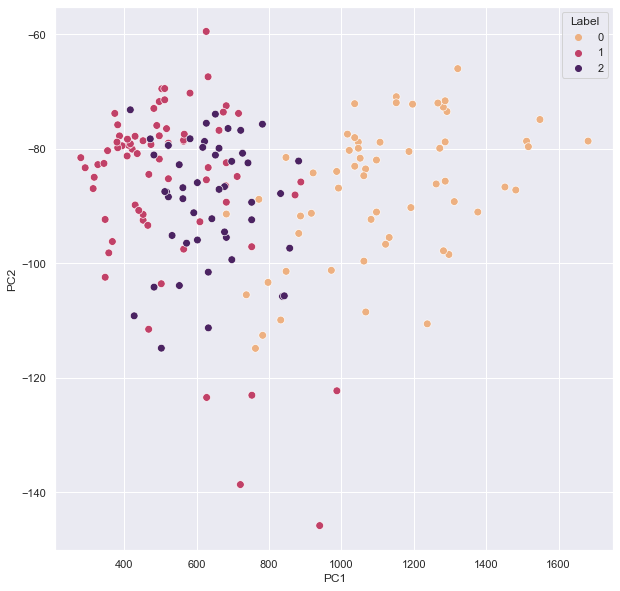

In [227]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df_true , x = 'PC1',y = 'PC2' , s = 60, hue = 'Label' , palette= 'flare')
plt.show()

In [228]:
X_reduce,eig_val,eig_vector = PCA(X,3)
#Creating a Pandas DataFrame of reduced Dataset
principal_df_3d = pd.DataFrame(X_reduce , columns = ['PC1','PC2','PC3'])
principal_df_3d['Label'] = wine.target


In [229]:
import plotly_express as px 

In [230]:
px.scatter_3d(principal_df_3d, x="PC1", y="PC2", z="PC3", 
              color="Label", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"Red"})

Explained variance ratio
 [0.9980912304918974, 0.0017359156247057478, 9.495895755145971e-05, 5.021735618215006e-05, 1.236368468785794e-05, 8.462130335193645e-06, 2.806814557231145e-06, 1.5230805328563145e-06, 1.1278304393016913e-06, 7.214158108199469e-07, 3.780602665124951e-07, 2.120137546072288e-07, 8.25392788092964e-08]

cumulative explained variance
 [0.99809123 0.99982715 0.99992211 0.99997232 0.99998469 0.99999315
 0.99999596 0.99999748 0.99999861 0.99999933 0.99999971 0.99999992
 1.        ]



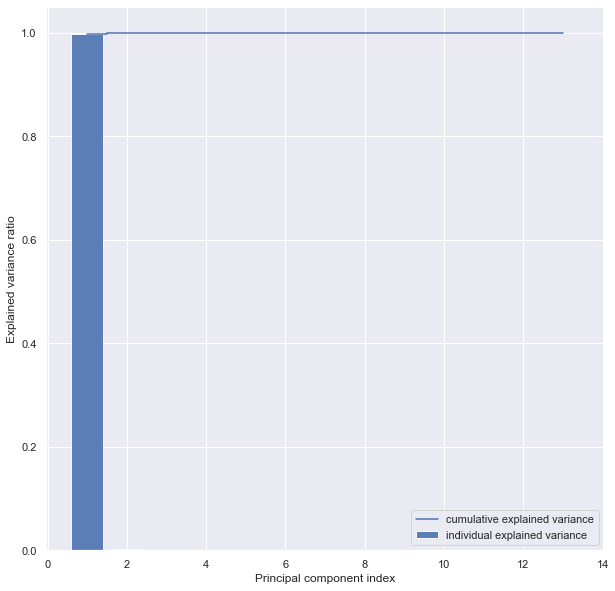

In [231]:
tot = sum(eig_val)
var_exp = [(i / tot) for i in eig_val]
print('Explained variance ratio\n',var_exp)
print()
cum_var_exp = np.cumsum(var_exp)
print('cumulative explained variance\n',cum_var_exp)
print()
plt.figure(figsize = (10,10))
plt.bar(range(1,14), var_exp, alpha=0.9, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [232]:
from scipy.spatial.distance import pdist, squareform

In [233]:
iris = datasets.load_iris()

In [234]:
sq_dists = pdist(iris.data, 'sqeuclidean')
sq_dists

array([0.29, 0.26, 0.42, ..., 0.38, 0.41, 0.59])

In [235]:
mat_sq_dists = squareform(sq_dists)
mat_sq_dists

array([[ 0.  ,  0.29,  0.26, ..., 19.89, 21.63, 17.14],
       [ 0.29,  0.  ,  0.09, ..., 20.24, 22.26, 17.25],
       [ 0.26,  0.09,  0.  , ..., 21.73, 23.51, 18.48],
       ...,
       [19.89, 20.24, 21.73, ...,  0.  ,  0.38,  0.41],
       [21.63, 22.26, 23.51, ...,  0.38,  0.  ,  0.59],
       [17.14, 17.25, 18.48, ...,  0.41,  0.59,  0.  ]])

# Kernel PCA

In [236]:
def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = np.exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    eigvals, eigvecs = np.linalg.eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    return X_pc

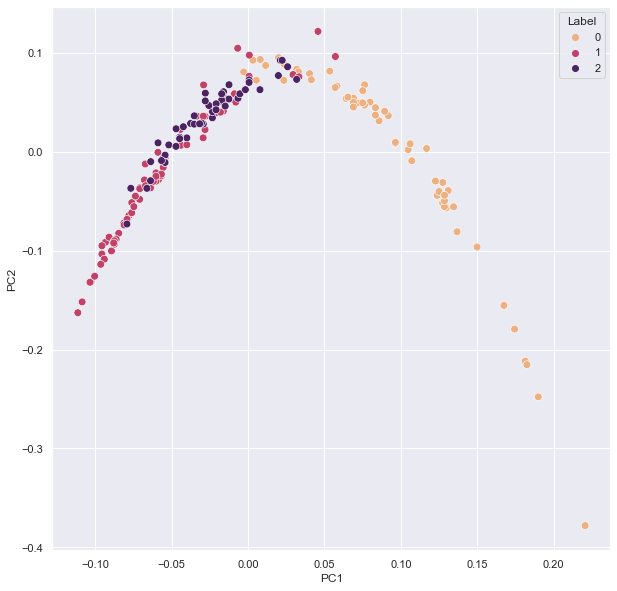

In [237]:
X_reduce = rbf_kernel_pca(X, 0.000000025, 2)
principal_df = pd.DataFrame(X_reduce , columns = ['PC1','PC2'])
principal_df['Label'] = wine.target

plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , s = 60 ,hue = 'Label' ,palette= 'flare')
plt.show()

In [238]:
X_reduce = rbf_kernel_pca(X, 0.000000025, 3)
principal_df_3d = pd.DataFrame(X_reduce , columns = ['PC1','PC2','PC3'])
principal_df_3d['Label'] = wine.target

px.scatter_3d(principal_df_3d, x="PC1", y="PC2", z="PC3", 
              color="Label", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"Red"})

# LDA (Linear Discriminant Analysis )

In [239]:
X = iris.data
Y = iris.target

In [240]:
classes = np.unique(Y)
M,N = X.shape
mean_vectors = []
for cl in range(0,len(classes)):
    mean_vectors.append(np.mean(X[Y==cl], axis=0))

In [241]:
pd.DataFrame(mean_vectors,index =iris.target_names, columns = iris.feature_names).transpose()

,setosa,versicolor,virginica
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


In [242]:

S_W = np.zeros((N,N))
for cl,mv in zip(range(0,len(classes)), mean_vectors):
    class_sc_mat = np.zeros((N,N))                  # scatter matrix for every class
    for row in X[Y == cl]:
        row, mv = row.reshape(N,1), mv.reshape(N,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
S_W += class_sc_mat                             # sum class scatter matrices
overall_mean = np.mean(X, axis=0)
S_W

array([[19.8128,  4.5944, 14.8612,  2.4056],
       [ 4.5944,  5.0962,  3.4976,  2.3338],
       [14.8612,  3.4976, 14.9248,  2.3924],
       [ 2.4056,  2.3338,  2.3924,  3.6962]])

In [243]:
S_B = np.zeros((N,N))
for i,mean_vec in enumerate(mean_vectors):  
    n = X[Y==i,:].shape[0]
    mean_vec = mean_vec.reshape(N,1) # make column vector
    overall_mean = overall_mean.reshape(N,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
S_B

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [244]:
np.linalg.inv(S_W).dot(S_B)

array([[-15.98248718,   5.70309542, -42.44376661, -18.07874719],
       [-19.55999836,   7.76986221, -52.73965353, -22.19337482],
       [ 27.70661222,  -9.99603946,  73.68893148,  31.35000363],
       [ 24.10330329,  -8.35204065,  63.75930109,  27.24330854]])

In [245]:
def LDA(X,Y,num_components):
    classes = np.unique(Y)
    M,N = X.shape
    mean_vectors = []
    for cl in range(0,len(classes)):
        mean_vectors.append(np.mean(X[Y==cl], axis=0))
    S_W = np.zeros((N,N))
    for cl,mv in zip(range(0,len(classes)), mean_vectors):
        class_sc_mat = np.zeros((N,N))                  # scatter matrix for every class
        for row in X[Y == cl]:
            row, mv = row.reshape(N,1), mv.reshape(N,1) # make column vectors
            class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
    overall_mean = np.mean(X, axis=0)

    S_B = np.zeros((N,N))
    for i,mean_vec in enumerate(mean_vectors):  
        n = X[Y==i,:].shape[0]
        mean_vec = mean_vec.reshape(N,1) # make column vector
        overall_mean = overall_mean.reshape(N,1) # make column vector
        S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
     
    sorted_index = np.argsort(eig_vals)[::-1]
    sorted_eigenvalue = eig_vals[sorted_index]
    sorted_eigenvectors = eig_vecs[:,sorted_index]
     
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose() ).transpose()
     
    return X_reduced,sorted_eigenvalue,sorted_eigenvectors
    # idx = np.argsort(eig_vals)[::-1]
    # eig_vals = eig_vals[idx]
    # eig_vecs = eig_vecs[:,idx]
    # Xmean = X-X
    # W = X.dot(eig_vecs.T[0:num_components].T)
    # return W

In [246]:
X = wine.data
Y = wine.target

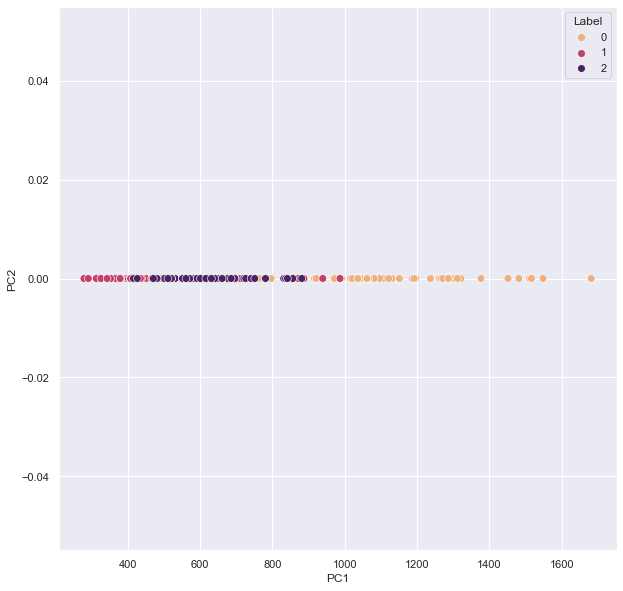

In [247]:
X_reduce,eig_val,eig_vec=PCA(X,1)
principal_df = pd.DataFrame( np.hstack((np.array(X_reduce),np.zeros_like(X_reduce))), columns = ['PC1','PC2'])
principal_df['Label'] = wine.target
plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , s = 60 ,hue = 'Label' ,palette= 'flare')
plt.show()

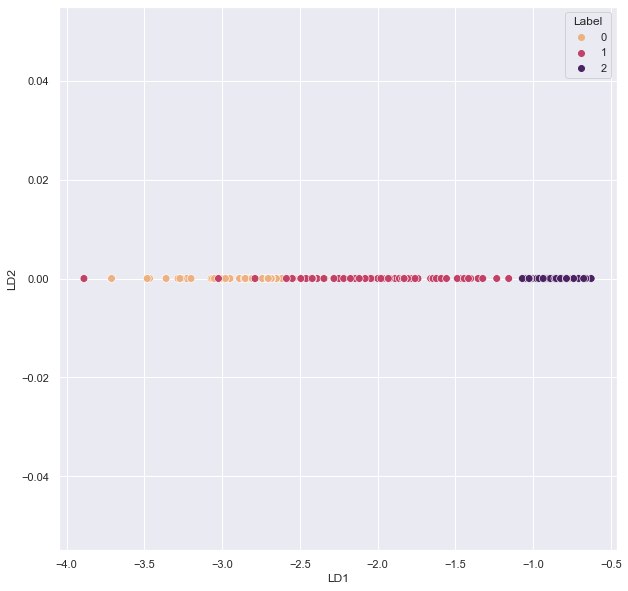

In [248]:
X_reduce,eig_val,eig_vec=LDA(X,Y,1)
principal_df = pd.DataFrame( np.hstack((np.array(X_reduce),np.zeros_like(X_reduce))), columns = ['LD1','LD2'])
principal_df['Label'] = wine.target
plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df , x = 'LD1',y = 'LD2' , s = 60 ,hue = 'Label' ,palette= 'flare')
plt.show()

Explained variance ratio [(0.8348256799387275+0j), (0.1651743200612724+0j), (4.9302250398285255e-17+0j), (2.168463077983347e-17+2.2274460815648582e-17j), (2.168463077983347e-17-2.2274460815648582e-17j), (1.2721983034204891e-17+1.8799056675417403e-18j), (1.2721983034204891e-17-1.8799056675417403e-18j), 0j, (-4.715181191890288e-18+0j), (-1.559266937913615e-17+0j), (-1.8999203640903565e-17+1.3118892211330434e-17j), (-1.8999203640903565e-17-1.3118892211330434e-17j), (-3.3947269360476554e-17+0j)]

cumulative explained variance [0.83482568+0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +2.22744608e-17j
 1.        +0.00000000e+00j 1.        +1.87990567e-18j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j 1.        +0.00000000e+00j
 1.        +1.31188922e-17j 1.        +0.00000000e+00j
 1.        +0.00000000e+00j]



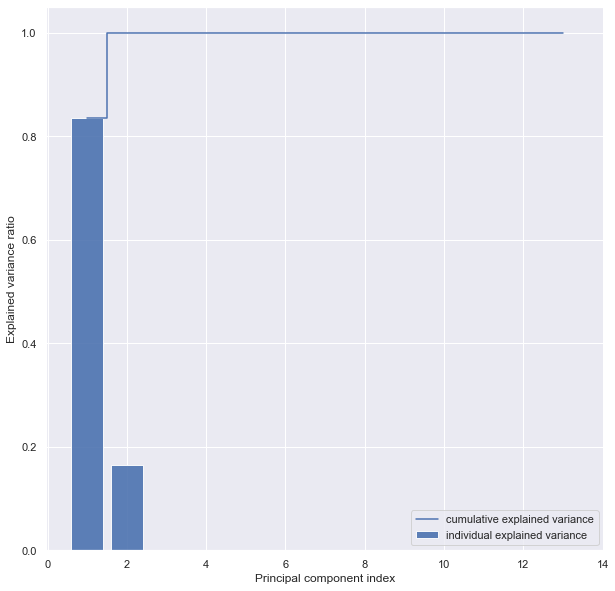

In [249]:
tot = sum(eig_val)
var_exp = [(i / tot) for i in eig_val]
print('Explained variance ratio',var_exp)
print()
cum_var_exp = np.cumsum(var_exp)
print('cumulative explained variance',cum_var_exp)
print()
plt.figure(figsize = (10,10))
plt.bar(range(1,14), var_exp, alpha=0.9, align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

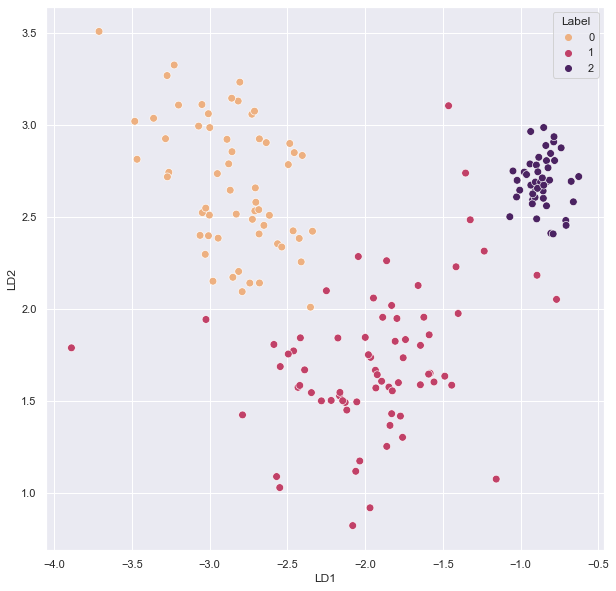

In [250]:
X_reduce,eig_val,eig_vec=LDA(X,Y,2)
principal_df = pd.DataFrame(X_reduce , columns = ['LD1','LD2'])
principal_df['Label'] = wine.target
plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df , x = 'LD1',y = 'LD2' , s = 60 ,hue = 'Label' ,palette= 'flare')
plt.show()

In [251]:
X_reduce,eig_val,eig_vec = LDA(X, Y, 3)
principal_df_3d = pd.DataFrame(np.float32(X_reduce) , columns = ['PC1','PC2','PC3'])
principal_df_3d['Label'] = wine.target



In [252]:
px.scatter_3d(principal_df_3d, x="PC1", y="PC2", z="PC3", 
              color="Label", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"Red"})